# pandas

Author: Julian Lißner<br>
For questions and feedback please write a mail to: [lissner@mib.uni-stuttgart.de](mailto:lissner@mib.uni-stuttgart.de)
------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 

## pandas...
- bringst `DataFrames` and `series` to python
- has table like arrangement of data
- is excellent to get an overview of data
- can be used to comminucate wiht table based programs (e.g. excel)
- is hard to learn and hard to master
- allows for variable datatypes

Data example from [www.kaggle.com](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

In [3]:
df = pd.read_csv( 'data/pandas_example.csv', delimiter=',\s*', engine='python' )
df.head()

rd diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]

In [4]:
df.head()
print( df.head() )

         rd diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0    842302         M  ...                  0.11890          NaN
1    842517         M  ...                  0.08902          NaN
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[5 rows x 33 columns]


#### Statistical measures/correlation
- relation in and between data can simply be displayed

In [5]:
df.describe()

rd  radius_mean  ...  fractal_dimension_worst  Unnamed: 32
count  5.690000e+02   569.000000  ...               569.000000          0.0
mean   3.037183e+07    14.127292  ...                 0.083946          NaN
std    1.250206e+08     3.524049  ...                 0.018061          NaN
min    8.670000e+03     6.981000  ...                 0.055040          NaN
25%    8.692180e+05    11.700000  ...                 0.071460          NaN
50%    9.060240e+05    13.370000  ...                 0.080040          NaN
75%    8.813129e+06    15.780000  ...                 0.092080          NaN
max    9.113205e+08    28.110000  ...                 0.207500          NaN

[8 rows x 32 columns]

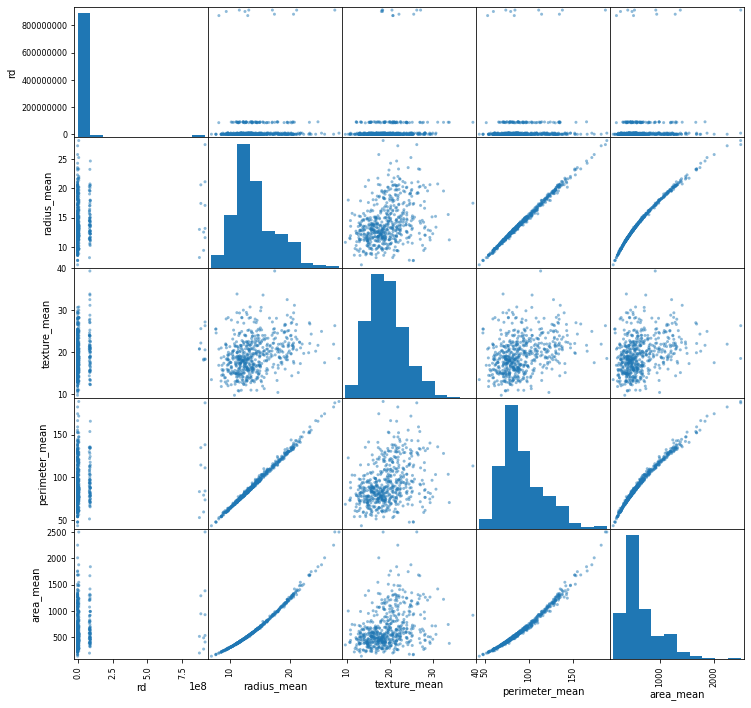

In [6]:
_ = pd.plotting.scatter_matrix( df.iloc[:,:6], figsize=(12,12) )
#%matplotlib inline

#### Boolean reductions
- comparison by columns possible

In [7]:
print( 'is any value greater than 0?\n', (df.iloc[:,2:] > 0 ).any() )
print( '\nare all value greater than 0?\n', (df.iloc[:,2:] > 0 ).all() )

is any value greater than 0?
 radius_mean                 True
texture_mean                True
perimeter_mean              True
area_mean                   True
smoothness_mean             True
compactness_mean            True
concavity_mean              True
concave points_mean         True
symmetry_mean               True
fractal_dimension_mean      True
radius_se                   True
texture_se                  True
perimeter_se                True
area_se                     True
smoothness_se               True
compactness_se              True
concavity_se                True
concave points_se           True
symmetry_se                 True
fractal_dimension_se        True
radius_worst                True
texture_worst               True
perimeter_worst             True
area_worst                  True
smoothness_worst            True
compactness_worst           True
concavity_worst             True
concave points_worst        True
symmetry_worst              True
fractal_dimen

---------------------
----------------------
#### Acessing elements
- `DataFrames` have (like 2d-arrays) rows and columns
- columns are generally labeled, rows are sometimes labeled
- data can be accessed by index or label <br>
$\quad$ via index: $\to$ `iloc[ :, :]` (analogue to `numpy`) <br>
$\quad$ via label: $\to$ `loc[ :, 'area_mean' : 'smoothness_worst']`
- both allow for slicing of multiple elements

In [8]:
ids = df.iloc[ 5:10, 0 ]
diagnosis = df.loc[ 5:10, 'diagnosis' ]
print( 'ids of the 5 patients\n', ids)
print( 'diagnosis of these 5 patients\n', diagnosis )

ids of the 5 patients
 5      843786
6      844359
7    84458202
8      844981
9    84501001
Name: rd, dtype: int64
diagnosis of these 5 patients
 5     M
6     M
7     M
8     M
9     M
10    M
Name: diagnosis, dtype: object


In [9]:
benign_idx = df.loc[:, 'diagnosis'] == 'B'
benign = df[ benign_idx]
benign.head()

rd diagnosis  ...  fractal_dimension_worst  Unnamed: 32
19   8510426         B  ...                  0.07259          NaN
20   8510653         B  ...                  0.08183          NaN
21   8510824         B  ...                  0.07773          NaN
37    854941         B  ...                  0.06169          NaN
46  85713702         B  ...                  0.07409          NaN

[5 rows x 33 columns]

We could use previous commands to further investigate this sub-frame. <br>
- A dataframe indexed with a string (or singleton) (`df[ 'string']`) accesses colums by name.

In [10]:
smooth_series = df[ 'smoothness_mean']
print( type( smooth_series) )
smooth_series.head()

<class 'pandas.core.series.Series'>


0    0.11840
1    0.08474
2    0.10960
3    0.14250
4    0.10030
Name: smoothness_mean, dtype: float64

In [11]:
smooth_df = df[[ 'smoothness_mean']]
print( type( smooth_df) )
smooth_df.head()

<class 'pandas.core.frame.DataFrame'>


smoothness_mean
0          0.11840
1          0.08474
2          0.10960
3          0.14250
4          0.10030

- A dataframe indexed with a list (`df[ 'string', 'string']`) accesses multiple colums by name

In [12]:
sub_df = df[[ 'smoothness_mean', 'diagnosis']]

- slicing with keys does not work without `df.loc`

In [13]:
sub_df = df[[ 'diagnosis':'smoothness_mean']]

SyntaxError: invalid syntax (Temp/ipykernel_9252/228375859.py, line 1)

- A dataframe indexed by slices (`df[0:n]`) accesses multiple rows/samples

In [14]:
df[ 2:5]

rd diagnosis  ...  fractal_dimension_worst  Unnamed: 32
2  84300903         M  ...                  0.08758          NaN
3  84348301         M  ...                  0.17300          NaN
4  84358402         M  ...                  0.07678          NaN

[3 rows x 33 columns]

- A dataframe indexed with a boolean array accesses the rows/samples

In [15]:
indices = np.random.randint( low=0, high=2, size=df.shape[0]).astype(bool)
df[ indices]

rd diagnosis  ...  fractal_dimension_worst  Unnamed: 32
0      842302         M  ...                  0.11890          NaN
2    84300903         M  ...                  0.08758          NaN
5      843786         M  ...                  0.12440          NaN
7    84458202         M  ...                  0.11510          NaN
8      844981         M  ...                  0.10720          NaN
..        ...       ...  ...                      ...          ...
556    924964         B  ...                  0.06742          NaN
557    925236         B  ...                  0.06969          NaN
558    925277         B  ...                  0.08004          NaN
563    926125         M  ...                  0.09873          NaN
565    926682         M  ...                  0.06637          NaN

[292 rows x 33 columns]

----------------
----------------

#### Treating missing numbers
- `nan` (not a number) is a missing numbers
- missing numbers usually can't be used by e.g. machine learning algorithms
- usual ways to replace nan is with 0, the mean or the median
- in some cases it is also better to drop the column

In [16]:
## Replacing nan
df_filled = df.copy()
print( 'are there any missing numbers?', df_filled.isna().any().any() )
df_filled = df_filled.fillna( 0 )
print( 'are there any missing numbers?', df_filled.isna().any().any() )

are there any missing numbers? True
are there any missing numbers? False


In [14]:
## Removing columns with nan 
df_popped = df.copy()
print( 'are there any missing numbers?', df_popped.isna().any().any() )
nan_columns = list( df_popped.columns[ df.isna().any()] )
print( 'columns containing nan', nan_columns)
for column in nan_columns:
    df_popped.pop( column)
print( 'are there any missing numbers?', df_popped.isna().any().any() )

are there any missing numbers? True
columns containing nan ['Unnamed: 32']
are there any missing numbers? False


#### Reading DataFrames from internet
- dataframes do not have to be stored locally
- read from url, store into memory <br>
$\quad$ (not recommended on low bandwidth setups)
- good for e.g. daily changing data

In [15]:
import xlrd

In [16]:
df = pd.read_excel('https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head()

dateRep  ...  Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0 2020-10-23  ...                                           2.452568         
1 2020-10-22  ...                                           2.350049         
2 2020-10-21  ...                                           2.173927         
3 2020-10-20  ...                                           2.105581         
4 2020-10-19  ...                                           2.258045         

[5 rows x 12 columns]

In [17]:
df.columns

Index(['dateRep', 'day', 'month', 'year', 'cases', 'deaths',
       'countriesAndTerritories', 'geoId', 'countryterritoryCode',
       'popData2019', 'continentExp',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [18]:
df['countriesAndTerritories']

0        Afghanistan
1        Afghanistan
2        Afghanistan
3        Afghanistan
4        Afghanistan
            ...     
50827       Zimbabwe
50828       Zimbabwe
50829       Zimbabwe
50830       Zimbabwe
50831       Zimbabwe
Name: countriesAndTerritories, Length: 50832, dtype: object

In [19]:
df['countriesAndTerritories'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

In [20]:
print( set( df['countriesAndTerritories']))

{'Mexico', 'Chile', 'Guam', 'Argentina', 'Belize', 'Cyprus', 'Paraguay', 'Djibouti', 'Cuba', 'Bangladesh', 'Liechtenstein', 'Latvia', 'Myanmar', 'Mongolia', 'CuraÃ§ao', 'Togo', 'Sint_Maarten', 'Algeria', 'South_Korea', 'Oman', 'Colombia', 'Bolivia', 'Dominica', 'Gambia', 'Jordan', 'Iraq', 'Sao_Tome_and_Principe', 'Vietnam', 'Ecuador', 'Montserrat', 'Equatorial_Guinea', 'Bahrain', 'Egypt', 'Jamaica', 'Comoros', 'Eritrea', 'United_Kingdom', 'Costa_Rica', 'Saint_Kitts_and_Nevis', 'Lesotho', 'Pakistan', 'Bahamas', 'Trinidad_and_Tobago', 'Sudan', 'United_States_of_America', 'Uruguay', 'South_Sudan', 'Malta', 'Lebanon', 'Central_African_Republic', 'New_Caledonia', 'Barbados', 'Cambodia', 'Australia', 'Rwanda', 'Ethiopia', 'Greenland', 'Guatemala', 'Taiwan', 'Isle_of_Man', 'United_Arab_Emirates', 'Liberia', 'Belarus', 'Saint_Lucia', 'Kosovo', 'Bulgaria', 'San_Marino', 'Burkina_Faso', 'Mauritania', 'Venezuela', 'Western_Sahara', 'Tajikistan', 'France', 'Libya', 'Indonesia', 'Puerto_Rico', 'Jer

- previous methods can also be applied

Pandas allows for various other functionalities which are out of scope of this course
their official website ([pandas.pydata.org](https://pandas.pydata.org/pandas-docs/stable/user_guide/basics.html)) contains introductional tutorials
-------